In [1]:
import sys
import os
import subprocess

sys.path.append('..')

import numpy as np
import psycopg2 as pg
import pandas as pd
import pandas.io.sql as psql
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
import matplotlib.pyplot as plt
from tqdm import tqdm

import tool.acqconv

Welcome to JupyROOT 6.10/00


In [2]:
con = pg.connect("dbname=eusospb_data user=eusospb password=1e20eVjemeuso host=localhost")

In [3]:
#event_ids_proc = subprocess.run(['bash', '-c', "cat /home/eusobg/EUSO-SPB/euso-spb-patt-reco-v1/notebooks/bg_tmpl_analysis/bg_tmp_analysis_results_limit_* /home/eusobg/EUSO-SPB/euso-spb-patt-reco-v1/notebooks/bg_tmpl_analysis/bg_tmp_analysis_intermediate_results.txt | sort -u"], shell=False, check=True, stdout=subprocess.PIPE)
#event_ids_str = event_ids_proc.stdout.decode()
# TODO pd.load_csv
with open("/home/eusobg/EUSO-SPB/euso-spb-patt-reco-v1/notebooks/bg_tmpl_analysis/bg_tmp_analysis_restriction_2240_results_limit_1000000_offset_0.txt","r") as f:
    all_event_ids_str = f.read()

In [4]:
event_ids_df = pd.DataFrame(data={'event_id':[int(evid.strip()) for evid in all_event_ids_str.split()]})
event_ids_df

,event_id
0,226390
1,228530
2,213513
3,147303
4,234927
5,65539
6,151129
7,239038
8,105992
9,75979


In [5]:
len(event_ids_df)

101262

In [6]:
event_ids_str = ",".join([str(evid) for evid in event_ids_df['event_id']])

In [7]:
valid_event_id_count_data = psql.read_sql(
    "SELECT COUNT(event_id) AS event_id_count, AVG(x_y_active_pixels_num) AS x_y_active_pixels_num_avg, source_file_acquisition FROM spb_processing_event_ver2 WHERE event_id IN ({}) GROUP BY source_file_acquisition ORDER BY event_id_count DESC".format(event_ids_str),con)

In [8]:
pd.set_option('display.max_colwidth', -1)
valid_event_id_count_data

,event_id_count,x_y_active_pixels_num_avg,source_file_acquisition
0,4964,2289.871676,allpackets-SPBEUSO-ACQUISITION-20170428-092901-001.001--LONG.root
1,3526,2289.220079,allpackets-SPBEUSO-ACQUISITION-20170427-082554-008.001--LONG.root
2,3422,2289.177966,allpackets-SPBEUSO-ACQUISITION-20170427-082554-010.001--LONG.root
3,1546,2288.719276,allpackets-SPBEUSO-ACQUISITION-20170427-082510-001.001--CHECK.root
4,714,2289.382353,allpackets-SPBEUSO-ACQUISITION-20170427-105115-001.001--CHECK.root
5,620,2290.029032,allpackets-SPBEUSO-ACQUISITION-20170428-120707-007.001--LONG.root
6,597,2289.085427,allpackets-SPBEUSO-ACQUISITION-20170429-070031-025.001--LONG.root
7,589,2288.431239,allpackets-SPBEUSO-ACQUISITION-20170428-081726-009.001--LONG.root
8,584,2289.308219,allpackets-SPBEUSO-ACQUISITION-20170428-140915-006.001--LONG.root
9,579,2289.233161,allpackets-SPBEUSO-ACQUISITION-20170427-115219-001.001--CHECK.root


In [9]:
valid_event_id_count_data.to_pickle('valid_event_id_count_data.pkl')

In [11]:
#valid_event_id_count_data.loc[valid_event_id_count_data['source_file_acquisition'] == 'allpackets-SPBEUSO-ACQUISITION-20170429-070031-004.001--LONG.root']

In [12]:
all_event_id_count_data = psql.read_sql(
    "SELECT " \
    "COUNT(event_id) AS event_id_count, AVG(x_y_active_pixels_num) AS x_y_active_pixels_num_avg, source_file_acquisition "\
    "FROM spb_processing_event_ver2 " \
    "WHERE source_file_acquisition LIKE 'allpackets-SPBEUSO-ACQUISITION-2017%' AND "\
    "source_file_acquisition NOT LIKE '%sqz.root' " \
    "GROUP BY source_file_acquisition ORDER BY event_id_count DESC ",con)

In [13]:
all_event_id_count_data

,event_id_count,x_y_active_pixels_num_avg,source_file_acquisition
0,10756,698.358312,allpackets-SPBEUSO-ACQUISITION-20170428-073329-001.001--LONG.root
1,6769,2034.180972,allpackets-SPBEUSO-ACQUISITION-20170428-094402-001.001--LONG.root
2,4964,2289.871676,allpackets-SPBEUSO-ACQUISITION-20170428-092901-001.001--LONG.root
3,3526,2289.220079,allpackets-SPBEUSO-ACQUISITION-20170427-082554-008.001--LONG.root
4,3422,2289.177966,allpackets-SPBEUSO-ACQUISITION-20170427-082554-010.001--LONG.root
5,2832,1436.220339,allpackets-SPBEUSO-ACQUISITION-20170428-093453-001.001--CHECK.root
6,2563,698.876317,allpackets-SPBEUSO-ACQUISITION-20170428-073613-002.001--LONG.root
7,2191,1650.922866,allpackets-SPBEUSO-ACQUISITION-20170426-140034-011.001--LONG.root
8,1981,1637.796063,allpackets-SPBEUSO-ACQUISITION-20170426-140034-009.001--LONG.root
9,1804,689.983925,allpackets-SPBEUSO-ACQUISITION-20170428-074212-001.001--LONG.root


In [14]:
all_event_id_count_data.loc[all_event_id_count_data['source_file_acquisition']=='allpackets-SPBEUSO-ACQUISITION-20170429-070031-004.001--LONG.root']

,event_id_count,x_y_active_pixels_num_avg,source_file_acquisition
134,463,2046.62635,allpackets-SPBEUSO-ACQUISITION-20170429-070031-004.001--LONG.root


In [15]:
intg9ec_event_id_count_data = psql.read_sql(
    "SELECT " \
    "COUNT(event_id) AS event_id_count, AVG(x_y_active_pixels_num) AS x_y_active_pixels_num_avg, source_file_acquisition "\
    "FROM spb_processing_event_ver2 " \
    "WHERE source_file_acquisition LIKE 'allpackets-SPBEUSO-ACQUISITION-2017%' "\
    " AND source_file_acquisition NOT LIKE '%sqz.root' " \
    " AND  x_y_active_pixels_num > 2048 " \
    "GROUP BY source_file_acquisition ORDER BY event_id_count DESC ",con)

In [16]:
intg9ec_event_id_count_data

,event_id_count,x_y_active_pixels_num_avg,source_file_acquisition
0,4964,2289.871676,allpackets-SPBEUSO-ACQUISITION-20170428-092901-001.001--LONG.root
1,3526,2289.220079,allpackets-SPBEUSO-ACQUISITION-20170427-082554-008.001--LONG.root
2,3422,2289.177966,allpackets-SPBEUSO-ACQUISITION-20170427-082554-010.001--LONG.root
3,1546,2288.719276,allpackets-SPBEUSO-ACQUISITION-20170427-082510-001.001--CHECK.root
4,1463,2289.717020,allpackets-SPBEUSO-ACQUISITION-20170427-125407-008.001--LONG-sqz-dis.root
5,809,2289.851669,allpackets-SPBEUSO-ACQUISITION-20170427-125407-007.001--LONG-sqz-dis.root
6,714,2289.382353,allpackets-SPBEUSO-ACQUISITION-20170427-105115-001.001--CHECK.root
7,656,2289.599085,allpackets-SPBEUSO-ACQUISITION-20170427-115303-013.001--LONG-sqz-dis.root
8,635,2289.686614,allpackets-SPBEUSO-ACQUISITION-20170427-125407-001.001--LONG-sqz-dis.root
9,620,2290.029032,allpackets-SPBEUSO-ACQUISITION-20170428-120707-007.001--LONG.root


In [26]:
#intg9ec_event_id_count_data.loc[intg9ec_event_id_count_data['source_file_acquisition']=='allpackets-SPBEUSO-ACQUISITION-20170429-070031-004.001--LONG.root']

In [18]:
#joined_valid_intg9ec_all = valid_event_id_count_data.join(intg9ec_event_id_count_data, how='outer',  rsuffix='_intg9ec',  on=['source_file_acquisition'])
joined_valid_intg9ec_all = pd.merge(valid_event_id_count_data, intg9ec_event_id_count_data,
                                    how='outer',
                                    suffixes=['_valid','_intg9ec'],
                                    on=['source_file_acquisition'])
joined_valid_intg9ec_all = pd.merge(joined_valid_intg9ec_all, all_event_id_count_data,
                                    how='outer',
                                    on=['source_file_acquisition'])

joined_valid_intg9ec_all['event_id_count_intg9ec_valid_diff'] = joined_valid_intg9ec_all['event_id_count_intg9ec'] - joined_valid_intg9ec_all['event_id_count_valid']
joined_valid_intg9ec_all['event_id_count_all_intg9ec_diff'] = joined_valid_intg9ec_all['event_id_count'] - joined_valid_intg9ec_all['event_id_count_intg9ec']

joined_valid_intg9ec_all = joined_valid_intg9ec_all[['source_file_acquisition','event_id_count_valid','event_id_count_intg9ec','event_id_count', 'event_id_count_intg9ec_valid_diff', 'event_id_count_all_intg9ec_diff', 'x_y_active_pixels_num_avg_valid', 'x_y_active_pixels_num_avg_intg9ec', 'x_y_active_pixels_num_avg']]


# Numbers events compared (valid, 9 EC, all)

In [19]:
joined_valid_intg9ec_all

,source_file_acquisition,event_id_count_valid,event_id_count_intg9ec,event_id_count,event_id_count_intg9ec_valid_diff,event_id_count_all_intg9ec_diff,x_y_active_pixels_num_avg_valid,x_y_active_pixels_num_avg_intg9ec,x_y_active_pixels_num_avg
0,allpackets-SPBEUSO-ACQUISITION-20170428-092901-001.001--LONG.root,4964.0,4964.0,4964,0.0,0.0,2289.871676,2289.871676,2289.871676
1,allpackets-SPBEUSO-ACQUISITION-20170427-082554-008.001--LONG.root,3526.0,3526.0,3526,0.0,0.0,2289.220079,2289.220079,2289.220079
2,allpackets-SPBEUSO-ACQUISITION-20170427-082554-010.001--LONG.root,3422.0,3422.0,3422,0.0,0.0,2289.177966,2289.177966,2289.177966
3,allpackets-SPBEUSO-ACQUISITION-20170427-082510-001.001--CHECK.root,1546.0,1546.0,1546,0.0,0.0,2288.719276,2288.719276,2288.719276
4,allpackets-SPBEUSO-ACQUISITION-20170427-105115-001.001--CHECK.root,714.0,714.0,714,0.0,0.0,2289.382353,2289.382353,2289.382353
5,allpackets-SPBEUSO-ACQUISITION-20170428-120707-007.001--LONG.root,620.0,620.0,620,0.0,0.0,2290.029032,2290.029032,2290.029032
6,allpackets-SPBEUSO-ACQUISITION-20170429-070031-025.001--LONG.root,597.0,597.0,597,0.0,0.0,2289.085427,2289.085427,2289.085427
7,allpackets-SPBEUSO-ACQUISITION-20170428-081726-009.001--LONG.root,589.0,589.0,589,0.0,0.0,2288.431239,2288.431239,2288.431239
8,allpackets-SPBEUSO-ACQUISITION-20170428-140915-006.001--LONG.root,584.0,584.0,584,0.0,0.0,2289.308219,2289.308219,2289.308219
9,allpackets-SPBEUSO-ACQUISITION-20170427-115219-001.001--CHECK.root,579.0,579.0,579,0.0,0.0,2289.233161,2289.233161,2289.233161


In [20]:
len(joined_valid_intg9ec_all.loc[joined_valid_intg9ec_all['event_id_count_all_intg9ec_diff'] == 0])

297

In [27]:
joined_valid_intg9ec_all.loc[joined_valid_intg9ec_all['event_id_count_all_intg9ec_diff'] > 0].sort_values(['event_id_count_all_intg9ec_diff'], ascending=[0])

,source_file_acquisition,event_id_count_valid,event_id_count_intg9ec,event_id_count,event_id_count_intg9ec_valid_diff,event_id_count_all_intg9ec_diff,x_y_active_pixels_num_avg_valid,x_y_active_pixels_num_avg_intg9ec,x_y_active_pixels_num_avg
366,allpackets-SPBEUSO-ACQUISITION-20170428-094402-001.001--LONG.root,NaN,4.0,6769,NaN,6765.0,NaN,2110.000000,2034.180972
369,allpackets-SPBEUSO-ACQUISITION-20170426-140034-011.001--LONG.root,NaN,4.0,2191,NaN,2187.0,NaN,2261.500000,1650.922866
362,allpackets-SPBEUSO-ACQUISITION-20170426-140034-009.001--LONG.root,NaN,5.0,1981,NaN,1976.0,NaN,2158.200000,1637.796063
390,allpackets-SPBEUSO-ACQUISITION-20170426-140034-013.001--LONG.root,NaN,1.0,1803,NaN,1802.0,NaN,2073.000000,1625.387687
346,allpackets-SPBEUSO-ACQUISITION-20170426-150138-003.001--LONG.root,NaN,7.0,1775,NaN,1768.0,NaN,2140.714286,1632.356056
347,allpackets-SPBEUSO-ACQUISITION-20170426-150138-008.001--LONG.root,NaN,7.0,1653,NaN,1646.0,NaN,2203.142857,1609.312160
377,allpackets-SPBEUSO-ACQUISITION-20170426-150138-005.001--LONG.root,NaN,3.0,1603,NaN,1600.0,NaN,2127.666667,1611.788522
339,allpackets-SPBEUSO-ACQUISITION-20170426-140034-003.001--LONG.root,NaN,9.0,1587,NaN,1578.0,NaN,2169.111111,1620.838689
342,allpackets-SPBEUSO-ACQUISITION-20170426-140034-004.001--LONG.root,NaN,8.0,1532,NaN,1524.0,NaN,2185.375000,1623.907963
368,allpackets-SPBEUSO-ACQUISITION-20170426-140034-001.001--LONG.root,NaN,4.0,1494,NaN,1490.0,NaN,2166.750000,1622.151941


## intg9ec - valid == 0

In [22]:
len(joined_valid_intg9ec_all.loc[joined_valid_intg9ec_all['event_id_count_intg9ec_valid_diff'] == 0])

234

## intg9ec - valid > 0

In [24]:
joined_valid_intg9ec_all.loc[joined_valid_intg9ec_all['event_id_count_intg9ec_valid_diff'] > 0].sort_values(['event_id_count_intg9ec_valid_diff'], ascending=[0])

,source_file_acquisition,event_id_count_valid,event_id_count_intg9ec,event_id_count,event_id_count_intg9ec_valid_diff,event_id_count_all_intg9ec_diff,x_y_active_pixels_num_avg_valid,x_y_active_pixels_num_avg_intg9ec,x_y_active_pixels_num_avg


In [25]:
len(joined_valid_intg9ec_all.loc[joined_valid_intg9ec_all['event_id_count_intg9ec_valid_diff'] > 0].sort_values(['event_id_count_intg9ec_valid_diff'], ascending=[0]))

0

In [167]:
def draw_packet_integated(df):
    
    if len(df) <= 0:
        print('No data to visualize', file=sys.stderr)
        return
    
    cols_in_fig = min(len(df)*2,10)
    rows_in_fig = (2*len(df)//cols_in_fig)+int((2*len(df) % cols_in_fig) > 0) if len(df) < 100 else 20
    fig, axs = plt.subplots(rows_in_fig, cols_in_fig)
    axs_flattened = axs.reshape(-1)
    i=0

    fig.set_size_inches(cols_in_fig*34.28/10,rows_in_fig*60/20)

#     print(len(df))

    ax_i = 0

    for idx, row in tqdm(df.iterrows()):
        frames = tool.acqconv.get_frames(row.source_file_acquisition_full, 128*row.packet_id, 128*row.packet_id+128, entry_is_gtu_optimization=True)
        max_integrated = np.maximum.reduce(frames)
        max_integrated_32 = np.maximum.reduce(frames[:32])

        #non_zero_in_max_integrated = np.count_nonzero(max_integrated)
        non_zero_in_max_integrated_32 = np.count_nonzero(max_integrated_32)

#         print(row)
#         print(np.sum(frames))
#         print("-"*20)
        
        if ax_i < 200-1:
            ax = axs_flattened[ax_i]
            im = ax.imshow(max_integrated)
            ax.set_title("event: {} (128)".format(row.event_id))
            ax.figure.colorbar(im, ax=ax) # label=zlabel

            ax_i += 1

            ax = axs_flattened[ax_i]
            im = ax.imshow(max_integrated_32)
            ax.set_title("event: {} (32)".format(row.event_id))
            ax.figure.colorbar(im, ax=ax) # label=zlabel

            ax_i +=1
        else:    
            break

    plt.show()
#print("Saving plot",file=sys.stderr)
#fig.savefig('/tmp/last_100ev_gt2048pix.png')


# Selected examples

In [151]:
def visualize_file_frames(source_file_acquisition, vis_invalid=True, vis_valid=True):
    global con
    global event_ids_df
    
    event_ids_intg9ec_srcf = psql.read_sql(
    "SELECT event_id, global_gtu, gtu_in_packet, packet_id, source_file_acquisition_full "\
    "FROM spb_processing_event_ver2 " \
    "WHERE source_file_acquisition = '{source_file_acquisition}' " \
    " AND  x_y_active_pixels_num > 2048 " \
    "ORDER BY event_id ASC".format(source_file_acquisition=source_file_acquisition),con)
    
    if vis_invalid:
        invalid_rows_srcf = event_ids_intg9ec_srcf[event_ids_intg9ec_srcf.apply(
            lambda row: row['event_id'] not in event_ids_df['event_id'].values, axis=1
        )]
        
        draw_packet_integated(invalid_rows_srcf)
    
    if vis_valid:
        valid_rows_srcf = event_ids_intg9ec_srcf[event_ids_intg9ec_srcf.apply(
            lambda row: row['event_id'] in event_ids_df['event_id'].values, axis=1
        )]

        draw_packet_integated(valid_rows_srcf)

## intg9ec - valid > 0

## intg9ec - valid == 0

4964it [15:07,  5.47it/s]


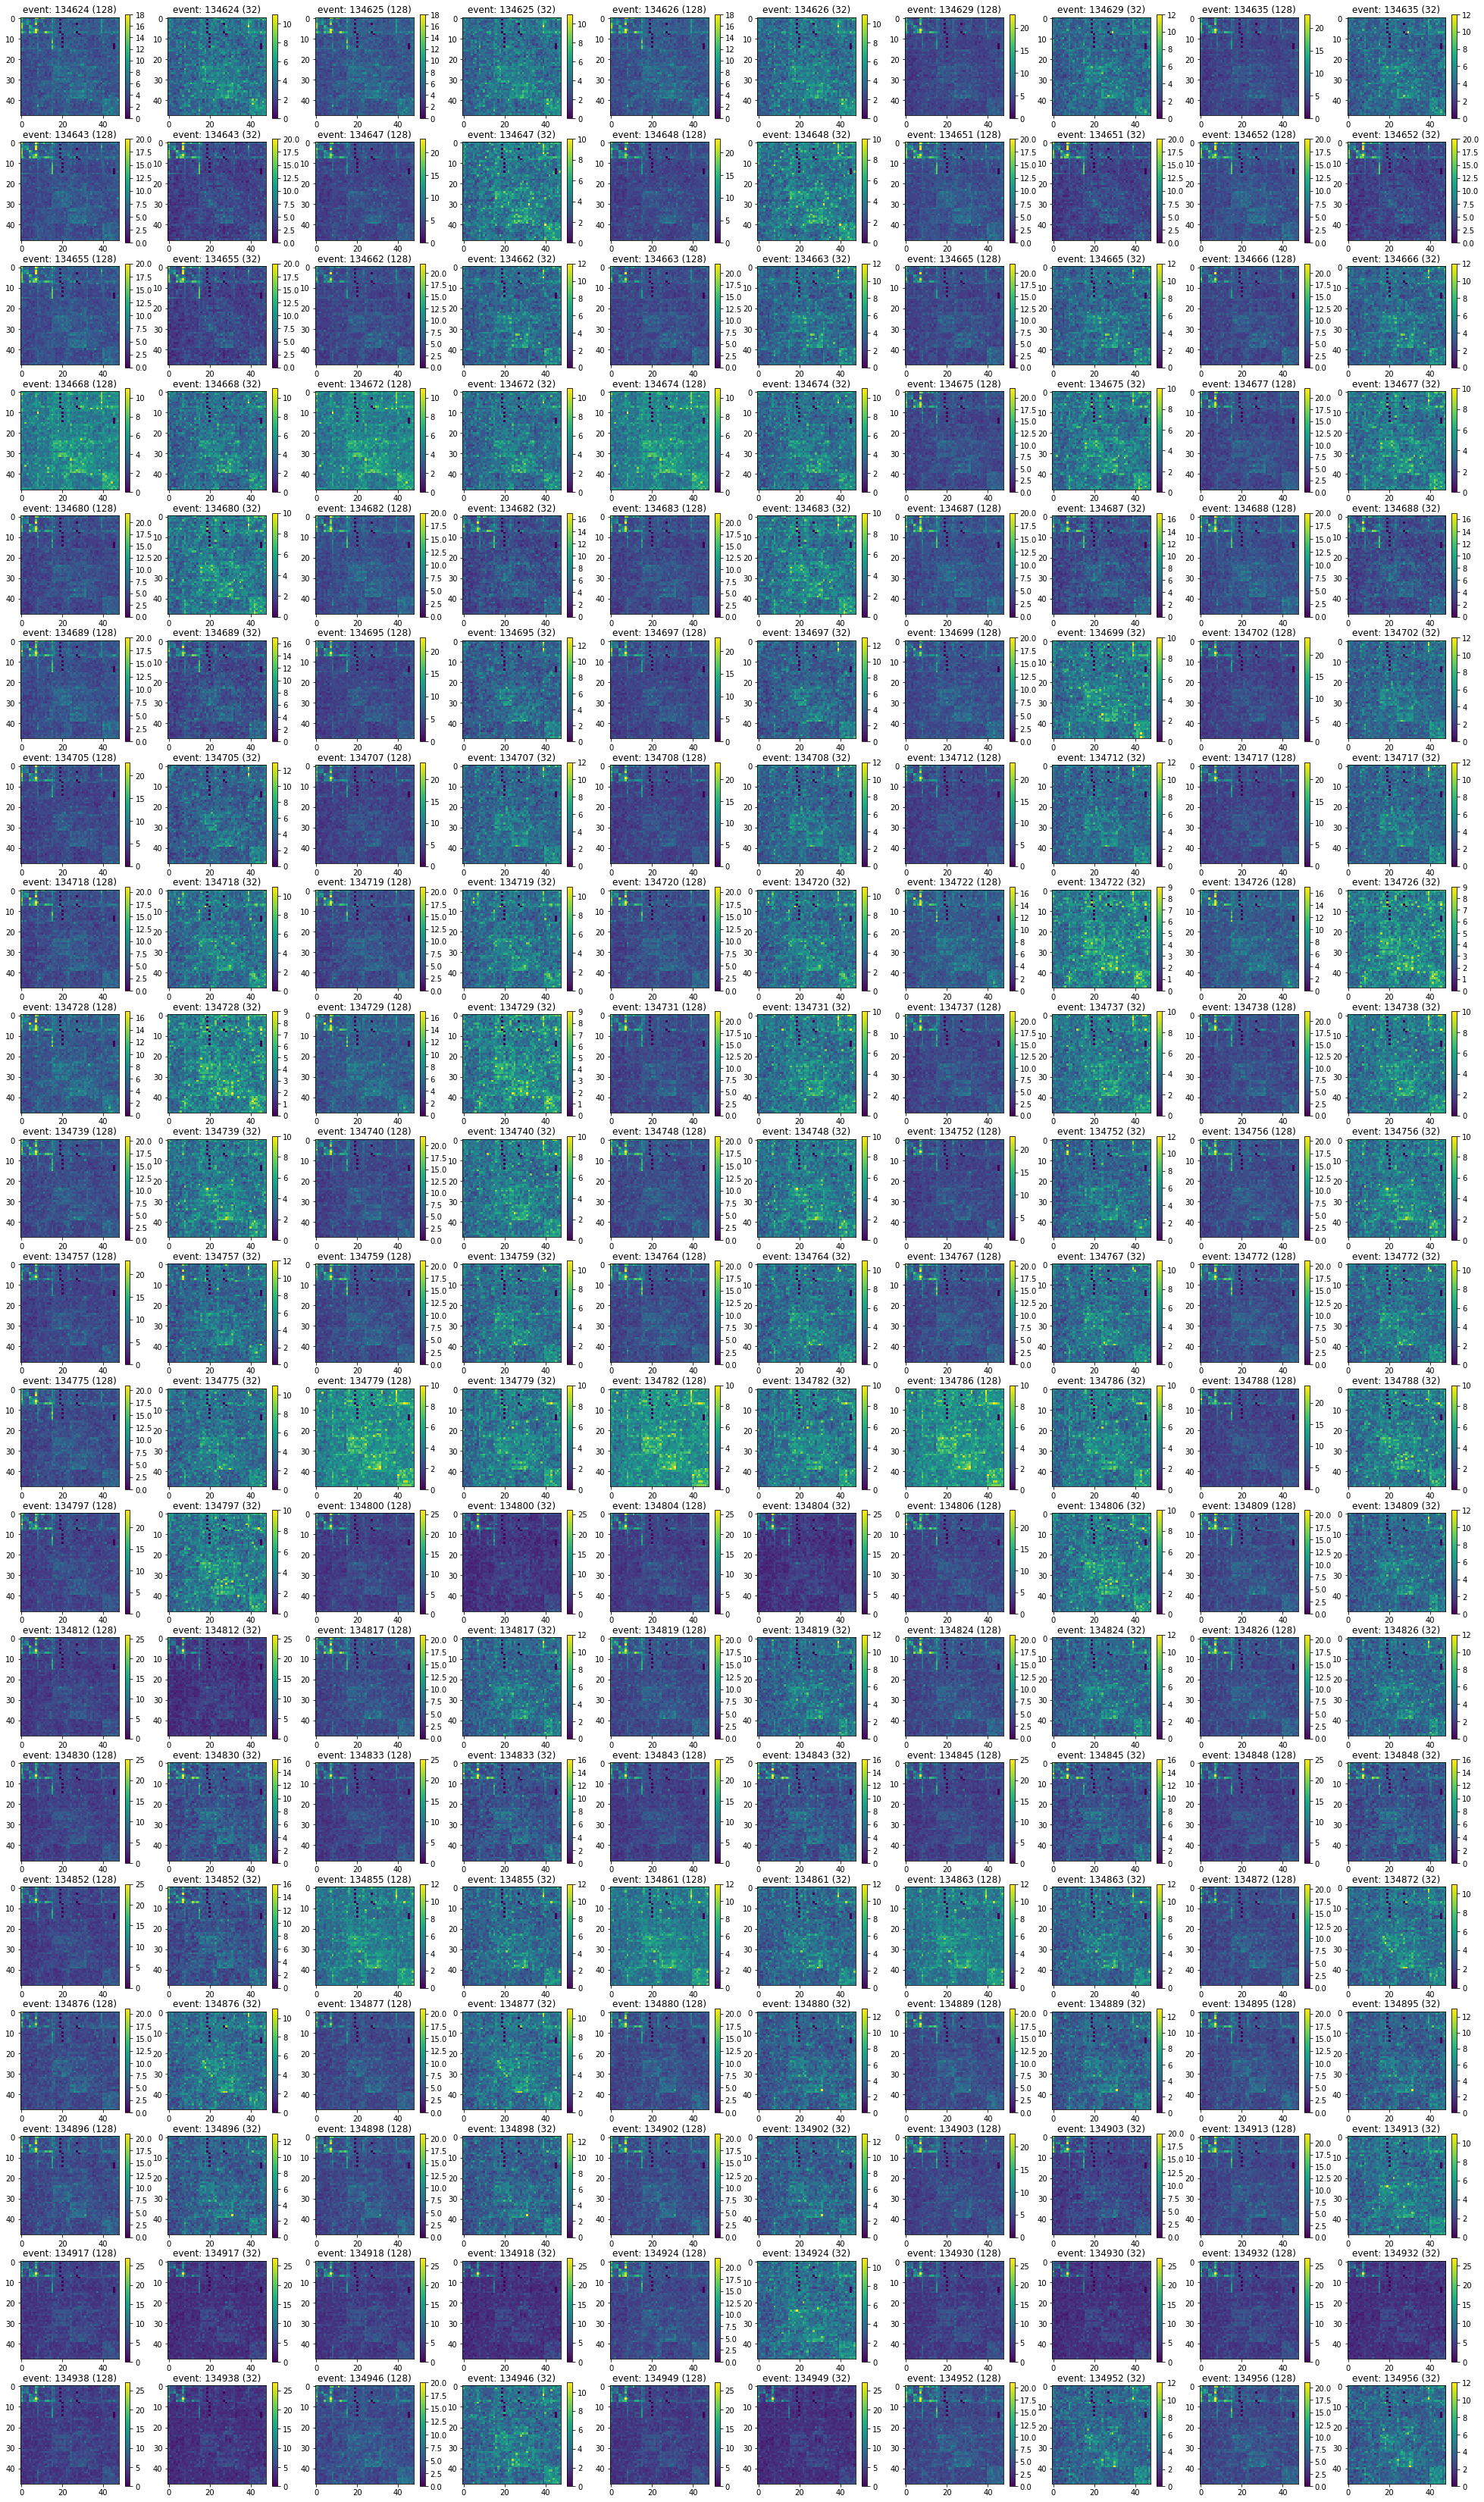

In [160]:
# allpackets-SPBEUSO-ACQUISITION-20170428-092901-001.001--LONG.root # the best
visualize_file_frames("allpackets-SPBEUSO-ACQUISITION-20170428-092901-001.001--LONG.root",False,True)


100it [00:40,  2.62it/s]

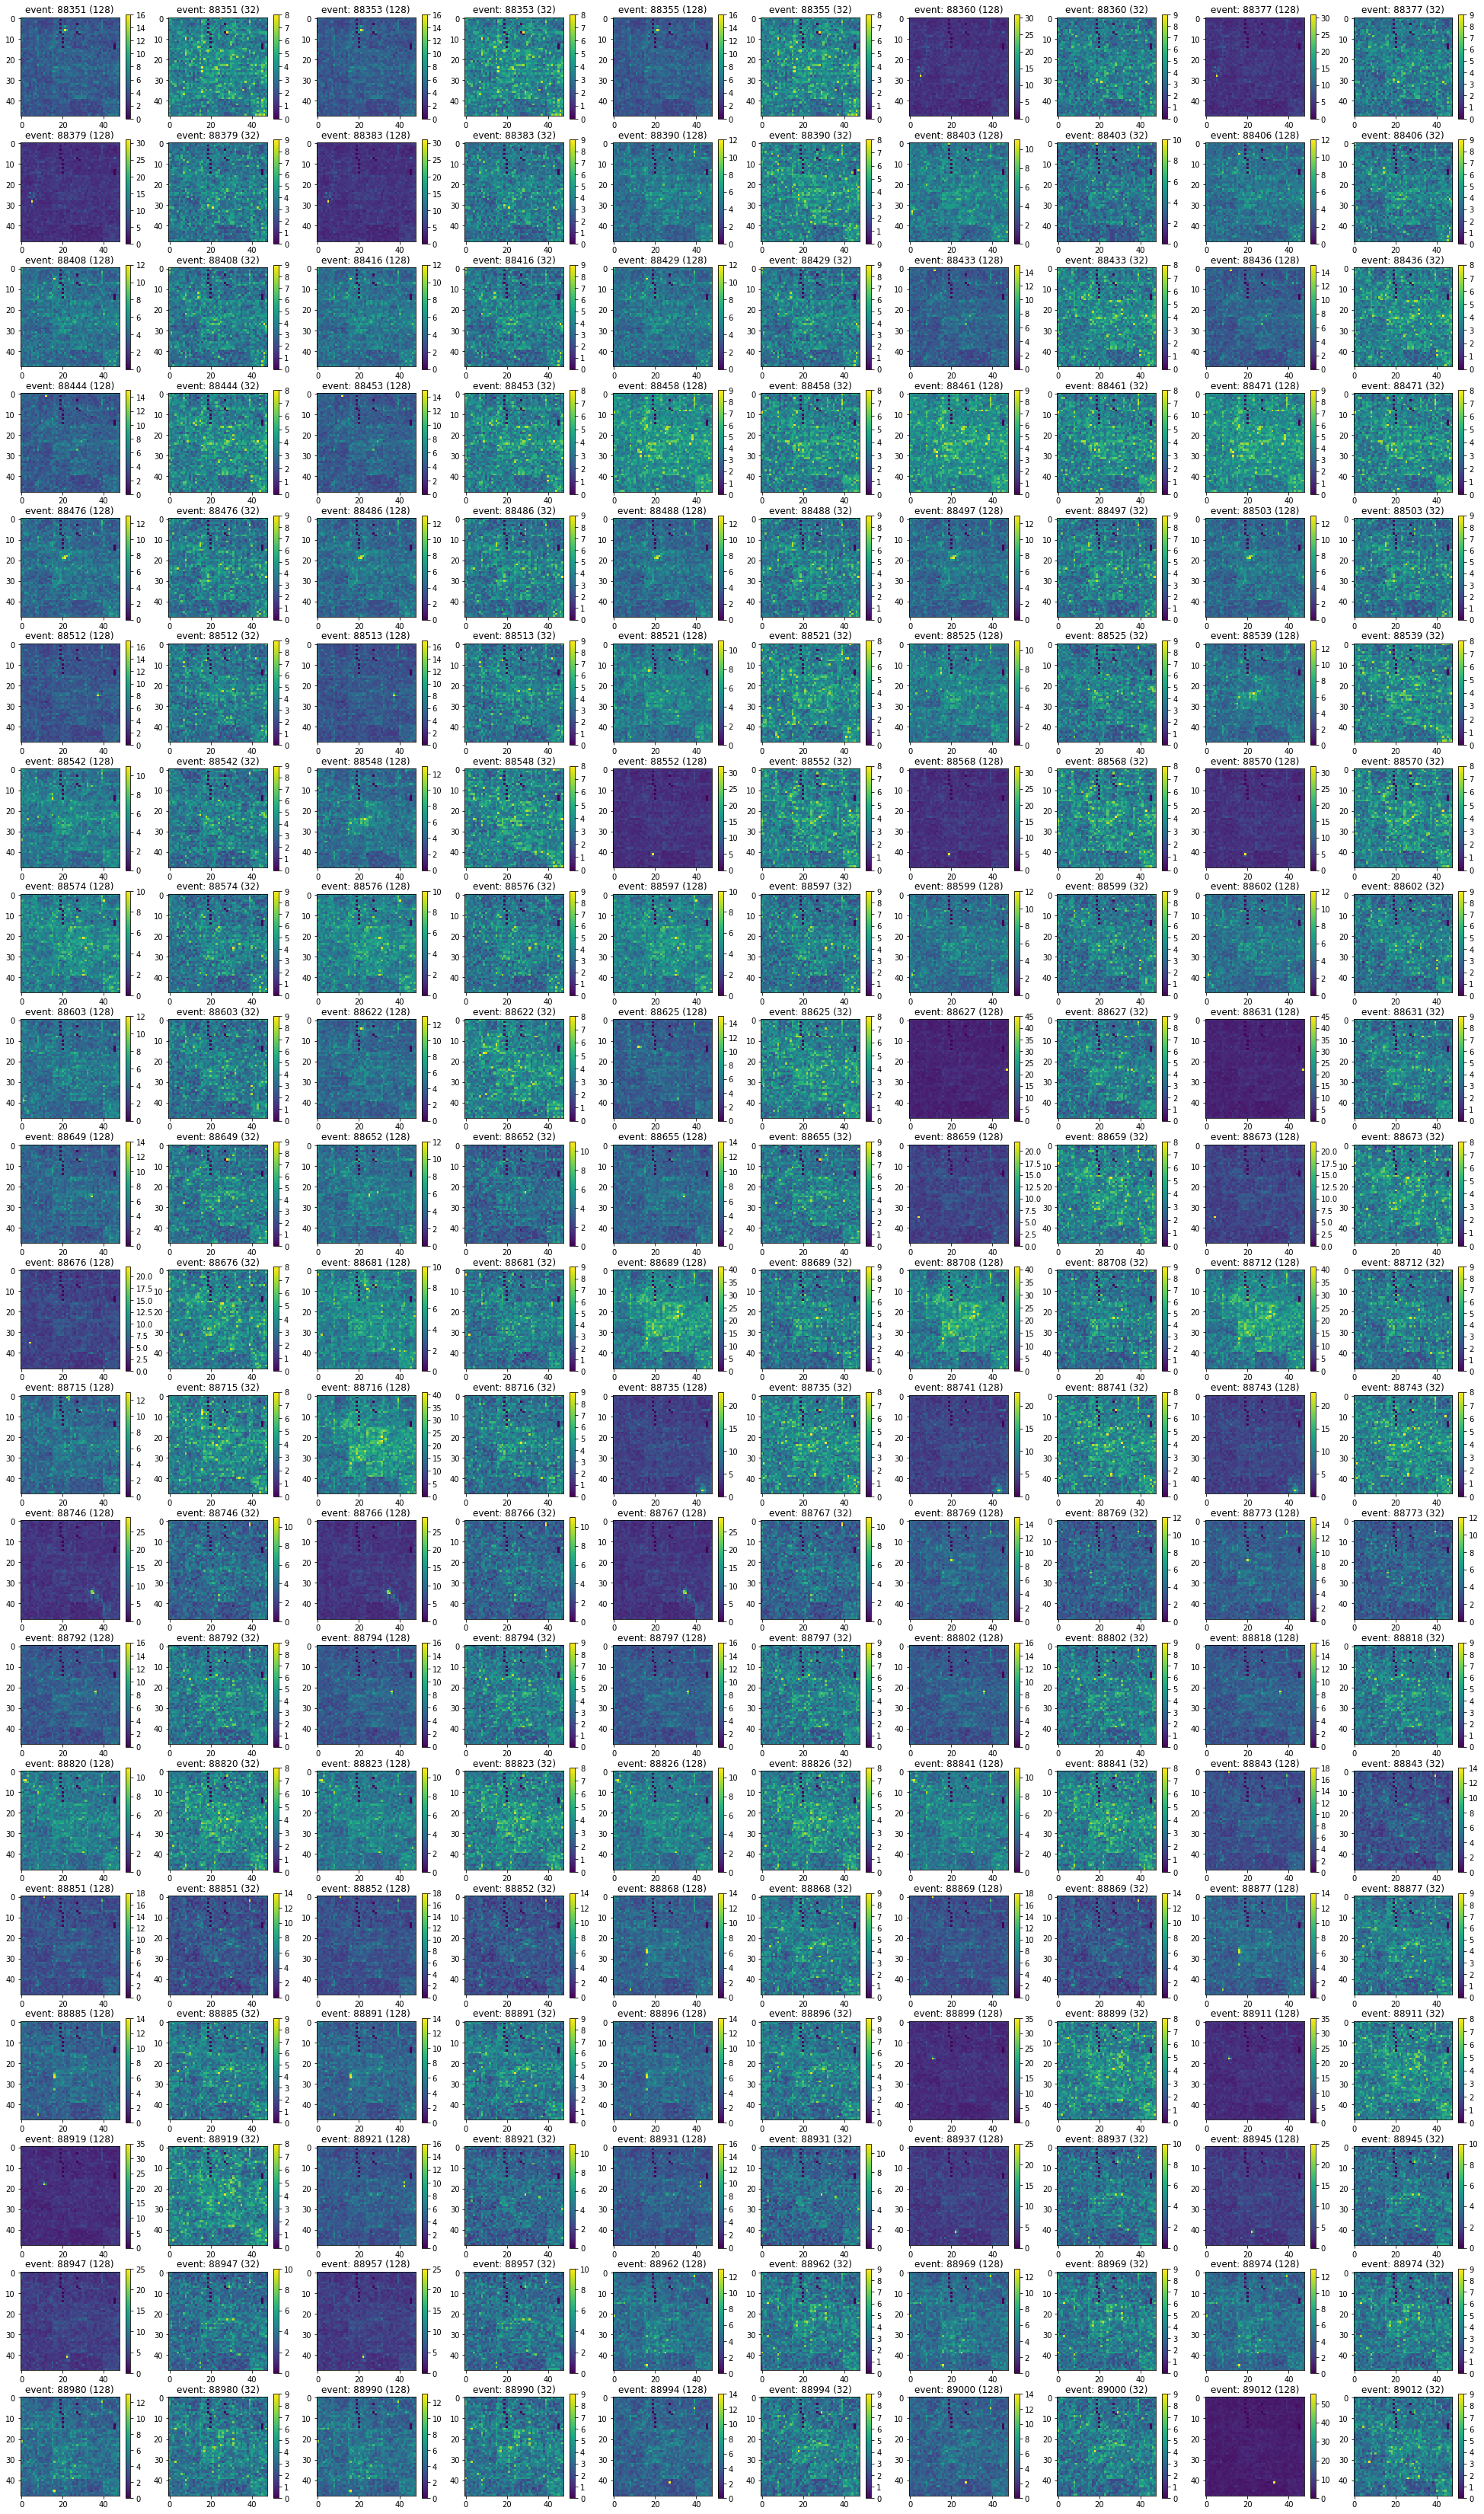

In [168]:
# allpackets-SPBEUSO-ACQUISITION-20170429-080135-004.001--LONG.root
visualize_file_frames("allpackets-SPBEUSO-ACQUISITION-20170429-080135-004.001--LONG.root",False,True)


0it [00:00, ?it/s]
1it [00:00,  2.71it/s]
100it [00:40,  2.58it/s]

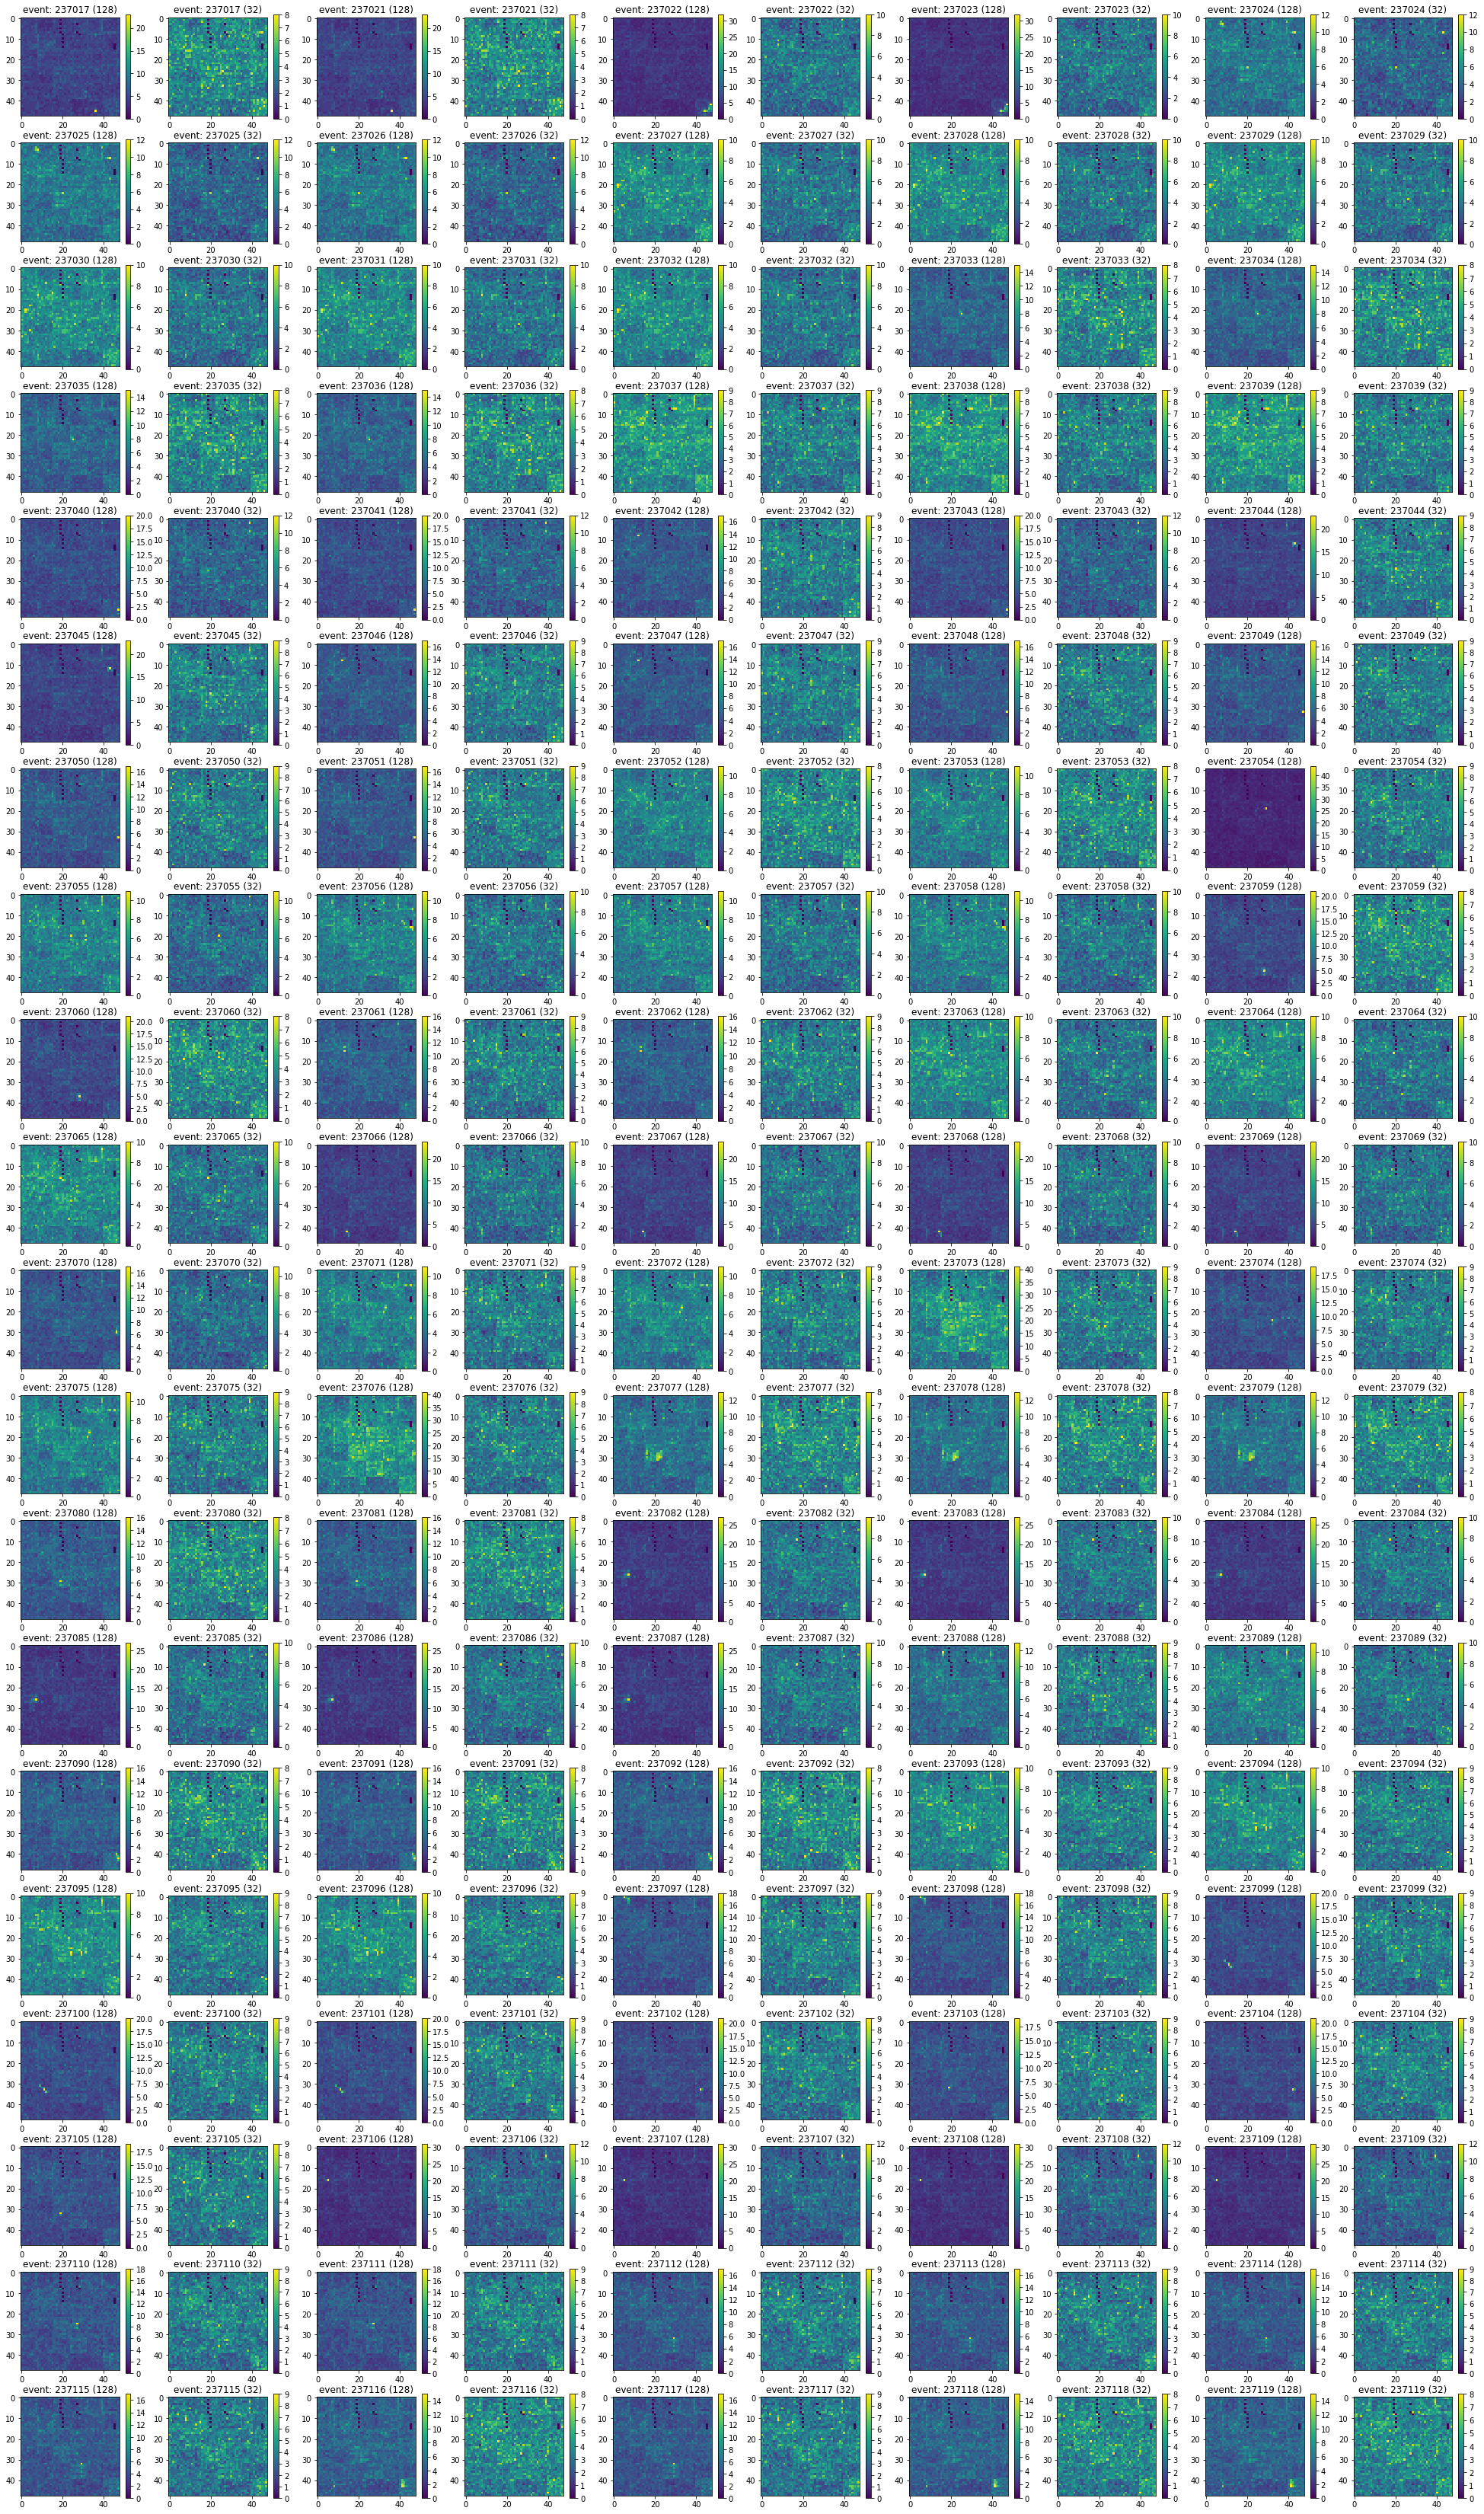

In [170]:
# allpackets-SPBEUSO-ACQUISITION-20170428-130811-018.001--LONG.root
visualize_file_frames("allpackets-SPBEUSO-ACQUISITION-20170428-130811-018.001--LONG.root",False,True)

# Final list of pathnames

In [46]:
valid_pathnames_df = psql.read_sql(
    "SELECT " \
    "COUNT(event_id) AS event_id_count, AVG(x_y_active_pixels_num) AS x_y_active_pixels_num_avg, source_file_acquisition, source_file_acquisition_full "\
    "FROM spb_processing_event_ver2 " \
    "WHERE source_file_acquisition IN ({}) " \
    "GROUP BY source_file_acquisition, source_file_acquisition_full ORDER BY event_id_count DESC ".format(
        "'"+("', '".join(joined_valid_intg9ec_all.loc[joined_valid_intg9ec_all['event_id_count_intg9ec_valid_diff'] == 0]['source_file_acquisition'].values))+"'"
    ),con)
valid_pathnames_df.sort_values(['source_file_acquisition'])

,event_id_count,x_y_active_pixels_num_avg,source_file_acquisition,source_file_acquisition_full
3,1546,2288.719276,allpackets-SPBEUSO-ACQUISITION-20170427-082510-001.001--CHECK.root,/media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170427/allpackets-SPBEUSO-ACQUISITION-20170427-082510-001.001--CHECK.root
1,3526,2289.220079,allpackets-SPBEUSO-ACQUISITION-20170427-082554-008.001--LONG.root,/media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170427/allpackets-SPBEUSO-ACQUISITION-20170427-082554-008.001--LONG.root
2,3422,2289.177966,allpackets-SPBEUSO-ACQUISITION-20170427-082554-010.001--LONG.root,/media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170427/allpackets-SPBEUSO-ACQUISITION-20170427-082554-010.001--LONG.root
4,714,2289.382353,allpackets-SPBEUSO-ACQUISITION-20170427-105115-001.001--CHECK.root,/media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170427/allpackets-SPBEUSO-ACQUISITION-20170427-105115-001.001--CHECK.root
9,579,2289.233161,allpackets-SPBEUSO-ACQUISITION-20170427-115219-001.001--CHECK.root,/media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170427/allpackets-SPBEUSO-ACQUISITION-20170427-115219-001.001--CHECK.root
58,479,2289.778706,allpackets-SPBEUSO-ACQUISITION-20170427-125323-001.001--CHECK.root,/media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170427/allpackets-SPBEUSO-ACQUISITION-20170427-125323-001.001--CHECK.root
198,214,2289.448598,allpackets-SPBEUSO-ACQUISITION-20170428-081641-001.001--CHECK.root,/media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170428/allpackets-SPBEUSO-ACQUISITION-20170428-081641-001.001--CHECK.root
16,552,2289.523551,allpackets-SPBEUSO-ACQUISITION-20170428-081726-006.001--LONG.root,/media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170428/allpackets-SPBEUSO-ACQUISITION-20170428-081726-006.001--LONG.root
7,589,2288.431239,allpackets-SPBEUSO-ACQUISITION-20170428-081726-009.001--LONG.root,/media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170428/allpackets-SPBEUSO-ACQUISITION-20170428-081726-009.001--LONG.root
11,571,2288.283713,allpackets-SPBEUSO-ACQUISITION-20170428-081726-011.001--LONG.root,/media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170428/allpackets-SPBEUSO-ACQUISITION-20170428-081726-011.001--LONG.root


In [44]:
for v in valid_pathnames_df['source_file_acquisition_full'].values:
    print(v)

/media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170428/allpackets-SPBEUSO-ACQUISITION-20170428-092901-001.001--LONG.root
/media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170427/allpackets-SPBEUSO-ACQUISITION-20170427-082554-008.001--LONG.root
/media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170427/allpackets-SPBEUSO-ACQUISITION-20170427-082554-010.001--LONG.root
/media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170427/allpackets-SPBEUSO-ACQUISITION-20170427-082510-001.001--CHECK.root
/media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170427/allpackets-SPBEUSO-ACQUISITION-20170427-105115-001.001--CHECK.root
/media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170428/allpackets-SPBEUSO-ACQUISITION-20170428-120707-007.001--LONG.root
/media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-20170429/allpackets-SPBEUSO-ACQUISITION-20170429-070031-025.001--LONG.root
/media/node15_data2/SPBDATA/allpackets-SPBEUSO-ACQUISITION-2

In [45]:
with open("gt35pmt_background.txt","w") as f:
    for v in valid_pathnames_df['source_file_acquisition_full'].values:
        f.write(v+"\n")